Project: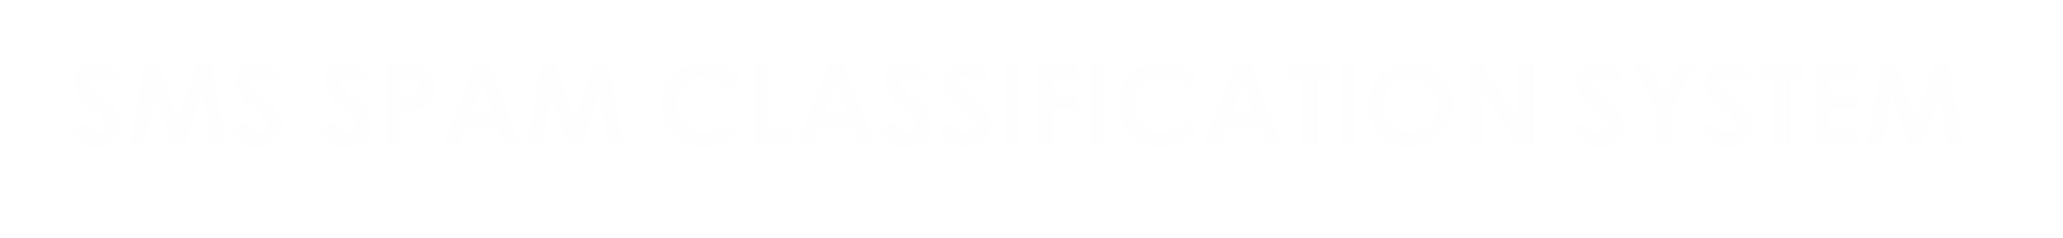

**BY**:
**Team** **spam callers:
Ananya Pavan Krishna (PES1202201151)
Meera Reji (PES1202201245)**

libraries and modules imported

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.stem.porter import PorterStemmer
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

**Data cleaning**

In [ ]:
data1=pd.read_csv("smsspamcollection.csv")
data1

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
data1.describe()

,type,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
spam_messages = data1[data1["type"]=="spam"]
spam_messages

,type,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [ ]:
encoder=LabelEncoder()
encoder.fit_transform(data1['type'])

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
data1['type'] = encoder.fit_transform(data1['type'])
data1 = data1.drop_duplicates(keep='first')

In [ ]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data1['num_characters'] = data1['message'].apply(len)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data1['num_words'] = data1['message'].apply(lambda x:len(nltk.word_tokenize(x)))
data1['num_sentences'] = data1['message'].apply(lambda x:len(nltk.sent_tokenize(x)))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data1[['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.344554,18.608822,1.955311
std,58.437457,13.419588,1.367516
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


text processing

In [ ]:
nltk.download('stopwords')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [ ]:
#transform_text(input())
#HI I AM abdslfc BUT THIS IS SO INTERESTING YAY!!@#

In [ ]:
data1['transformed_text'] = data1['message'].apply(transform_text)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Data visualisation

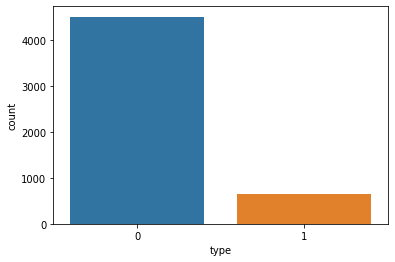

In [ ]:
sns.countplot(data = data1, x= data1["type"])

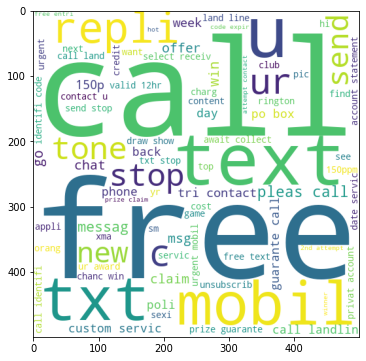

In [ ]:

wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(data1[data1['type'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

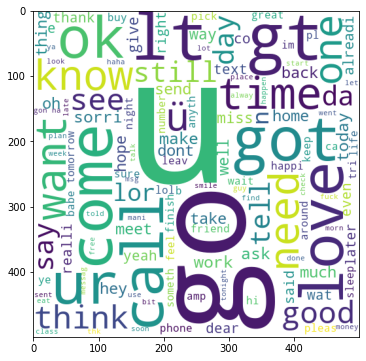

In [ ]:
ham_wc = wc.generate(data1[data1['type'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


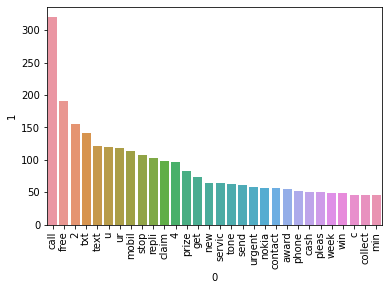

In [ ]:
spam_corpus = []
for msg in data1[data1['type'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


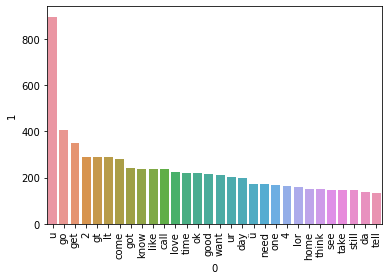

In [ ]:
ham_corpus = []
for msg in data1[data1['type'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

model building

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(data1['transformed_text']).toarray()
y = data1['type'].values


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
#various models we tried
knc = KNeighborsClassifier()
mnb = MultinomialNB()
gnb=GaussianNB()
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

Input and Output

In [ ]:
n=input()
a=transform_text(n)

vector_input=tfidf.transform([a])
mnb.fit(X_train,y_train)

result=mnb.predict(vector_input)[0]
if result==1:
  print("Spam message detected!!")
else:
  print("Ham message detected!")

## call or text this number to get a free mobile ring tone for free!!
## limited offer reply to get 2 guaranteed prize..

## hi dude bring a book today,,,
## that movie was so good!!

call or text this number to get a free mobile ring tone for free!!
Spam message detected!!
